In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
from scipy.misc import imread
import seaborn as sns
import numpy as np
sns.set_context('poster')
sns.set_style({'grid.alpha': '.1'})

In [3]:
image = imread("test.jpg")

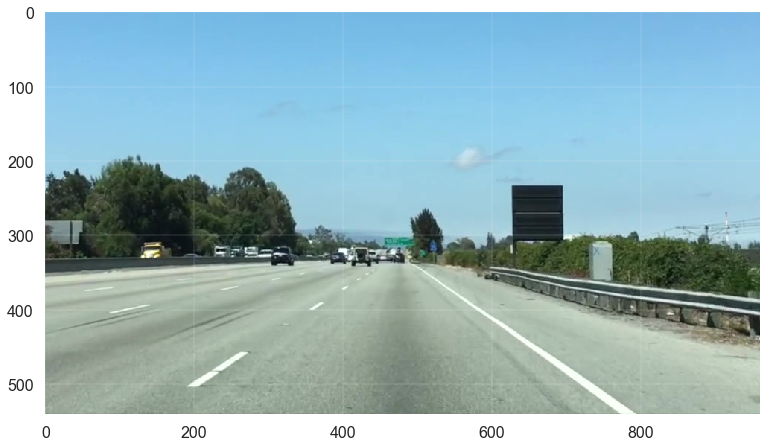

In [4]:
plt.imshow(image)

In [5]:
ysize, xsize, _ = image.shape

In [6]:
color_image = np.copy(image)
line_image = np.copy(image)

In [7]:
rgb_threshold = (220,220,220)

In [8]:
left_bottom = (0, ysize)
right_bottom = (xsize, ysize)
apex = (xsize/2, ysize/3)

In [9]:
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

In [10]:
# Mask pixels below the threshold
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                    (image[:,:,1] < rgb_threshold[1]) | \
                    (image[:,:,2] < rgb_threshold[2])

In [11]:
# Find the region inside the lines
# creates a matrix with 1s where the pixel is inside the triangle defined
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

In [12]:
# Mask color selection
color_image[color_thresholds] = [0,0,0]
# Find where image is both colored right and in the region
line_image[~color_thresholds & region_thresholds] = [255,0,0]

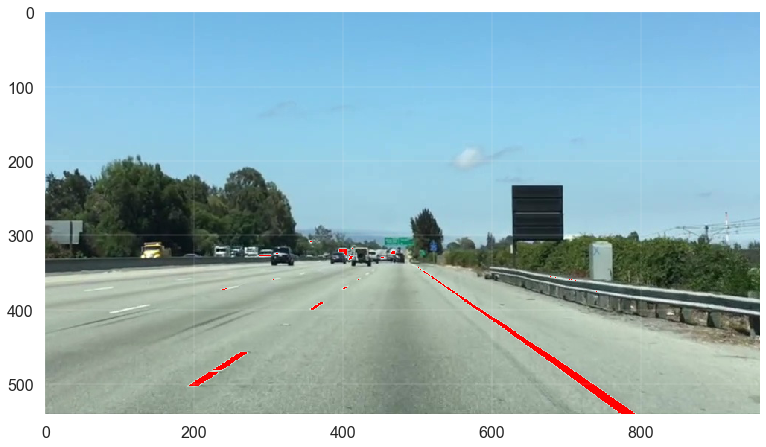

In [13]:
# Display our two output images
plt.imshow(color_image)
plt.imshow(line_image)


In [64]:
plt.close()